# Day 10 : Data Loading and Manipulation and Visulatiozation (Facies)

### You can use the following liberaries for your assignment:
> Numpy, Pandas, Matplotlib, Seaborn, LASIO, Welly

## Kindly load the las file of well1513.csv file from the data folder
## Perform the below Tasks:

>1. Investigate the component of the data file (number of columns , numbers of observations, Null values, normal statistics) 
2. Create subset including (DT, NPHI, GR,SP) logs
3. Create a function to Normalize the well logs using formula (X-Xmin / Xmax-Xmin).
4. Create a function to Standarize the well logs using formula (X-mean / standard deviation).
5. Plot histogram of the normalized and standarized well logs.



In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sb
import lasio

In [2]:
# read log file
df = pd.read_csv("well1513.csv")
#1. Investigate the component of the data file (number of columns , numbers of observations, Null values, normal statistics)
display(df)

,Unnamed: 0,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18265,18265,15/9-13,3271.416,437593.40625,6470983.0,-3245.549316,ZECHSTEIN GP.,Smith Bank Fm.,8.541623,NaN,...,1.524012,NaN,NaN,-0.005047,0.155774,NaN,NaN,NaN,74000,3.0
18266,18266,15/9-13,3271.568,437593.37500,6470983.0,-3245.700928,ZECHSTEIN GP.,Smith Bank Fm.,8.557213,NaN,...,2.056166,NaN,NaN,0.002087,0.155774,NaN,NaN,NaN,74000,3.0
18267,18267,15/9-13,3271.720,437593.37500,6470983.0,-3245.852539,ZECHSTEIN GP.,Smith Bank Fm.,8.577917,NaN,...,2.909438,NaN,NaN,0.007469,0.155774,NaN,NaN,NaN,74000,3.0
18268,18268,15/9-13,3271.872,437593.37500,6470983.0,-3246.004395,ZECHSTEIN GP.,Smith Bank Fm.,8.478219,NaN,...,2.909438,NaN,NaN,0.010048,0.155774,NaN,NaN,NaN,74000,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         18270 non-null  int64  
 1   WELL                               18270 non-null  object 
 2   DEPTH_MD                           18270 non-null  float64
 3   X_LOC                              18270 non-null  float64
 4   Y_LOC                              18270 non-null  float64
 5   Z_LOC                              18270 non-null  float64
 6   GROUP                              18270 non-null  object 
 7   FORMATION                          15806 non-null  object 
 8   CALI                               18270 non-null  float64
 9   RSHA                               1623 non-null   float64
 10  RMED                               18270 non-null  float64
 11  RDEP                               18270 non-null  flo

In [4]:
# null values
df.isnull().sum()

Unnamed: 0                               0
WELL                                     0
DEPTH_MD                                 0
X_LOC                                    0
Y_LOC                                    0
Z_LOC                                    0
GROUP                                    0
FORMATION                             2464
CALI                                     0
RSHA                                 16647
RMED                                     0
RDEP                                     0
RHOB                                     0
GR                                       0
SGR                                  18270
NPHI                                  4238
PEF                                   1830
DTC                                     81
SP                                       0
BS                                   18270
ROP                                    109
DTS                                  18270
DCAL                                 18270
DRHO       

In [5]:
# dataframe copy
df_copy=df
# drop the invalid columns
df_copy.drop(columns=['FORMATION', 'RSHA', 'SGR', 'BS', 'DTS', 'DCAL', 'RMIC', 'ROPA', 'RXO'], inplace=True)
# drop nan values
df_copy.dropna(inplace=True)
df_copy.isna().sum()

Unnamed: 0                           0
WELL                                 0
DEPTH_MD                             0
X_LOC                                0
Y_LOC                                0
Z_LOC                                0
GROUP                                0
CALI                                 0
RMED                                 0
RDEP                                 0
RHOB                                 0
GR                                   0
NPHI                                 0
PEF                                  0
DTC                                  0
SP                                   0
ROP                                  0
DRHO                                 0
MUDWEIGHT                            0
FORCE_2020_LITHOFACIES_LITHOLOGY     0
FORCE_2020_LITHOFACIES_CONFIDENCE    0
dtype: int64

In [6]:
# MD to be the index
df_copy.set_index('DEPTH_MD', inplace=True)
df_copy

,Unnamed: 0,WELL,X_LOC,Y_LOC,Z_LOC,GROUP,CALI,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,ROP,DRHO,MUDWEIGHT,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
DEPTH_MD,,,,,,,,,,,,,,,,,,,,
1138.704,4238,15/9-13,437640.84375,6470976.0,-1113.655396,NORDLAND GP.,19.322735,1.013309,1.091499,1.774626,55.892757,0.765867,1.631495,147.837677,45.547737,84.680267,0.017014,0.131809,30000,1.0
1138.856,4239,15/9-13,437640.84375,6470976.0,-1113.807373,NORDLAND GP.,18.613674,1.088184,1.122706,1.800986,60.929138,0.800262,1.645080,142.382431,45.914387,84.598869,0.003747,0.131809,65000,1.0
1139.008,4240,15/9-13,437640.84375,6470976.0,-1113.959473,NORDLAND GP.,18.212072,1.127155,1.148141,1.817696,62.117264,0.765957,1.645873,138.258331,46.039104,80.529831,-0.000257,0.131809,65000,1.0
1139.160,4241,15/9-13,437640.84375,6470976.0,-1114.111450,NORDLAND GP.,18.134182,1.141467,1.170984,1.829333,61.010860,0.702521,1.620216,139.198914,46.826984,59.596161,0.002608,0.131809,65000,1.0
1139.312,4242,15/9-13,437640.84375,6470976.0,-1114.263428,NORDLAND GP.,18.033762,1.138007,1.184080,1.813854,58.501236,0.639708,1.504854,144.290085,46.950382,56.803669,0.005400,0.131809,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993.256,16435,15/9-13,437606.62500,6470984.0,-2967.740723,VESTLAND GP.,9.580834,2.646204,2.511882,2.468236,90.537521,0.341534,4.699200,86.474564,126.591156,3.740737,0.040710,0.155774,65000,1.0
2993.408,16436,15/9-13,437606.62500,6470984.0,-2967.892578,VESTLAND GP.,9.656811,2.702784,2.471810,2.457519,88.819122,0.351085,4.699200,86.187599,126.740936,3.740737,0.029232,0.155774,65000,1.0
2993.560,16437,15/9-13,437606.62500,6470984.0,-2968.044678,VESTLAND GP.,9.569174,2.661824,2.460973,2.429228,92.128922,0.364982,4.699200,87.797836,126.590904,3.740737,0.027577,0.155774,65000,1.0


In [7]:
#2. Create subset including (DT, NPHI, GR,SP) logs
df_subset=df_copy[['DTC', 'NPHI', 'GR', 'SP']]
df_subset

,DTC,NPHI,GR,SP
DEPTH_MD,,,,
1138.704,147.837677,0.765867,55.892757,45.547737
1138.856,142.382431,0.800262,60.929138,45.914387
1139.008,138.258331,0.765957,62.117264,46.039104
1139.160,139.198914,0.702521,61.010860,46.826984
1139.312,144.290085,0.639708,58.501236,46.950382
...,...,...,...,...
2993.256,86.474564,0.341534,90.537521,126.591156
2993.408,86.187599,0.351085,88.819122,126.740936
2993.560,87.797836,0.364982,92.128922,126.590904


In [8]:
#3. Create a function to normalize the well logs using formula (X-Xmin / Xmax-Xmin)
df_norm = (df_subset - df_subset.min()) / (df_subset.max() - df_subset.min())
df_norm

,DTC,NPHI,GR,SP
DEPTH_MD,,,,
1138.704,0.851428,0.954879,0.100848,0.097834
1138.856,0.801002,1.000000,0.111068,0.101532
1139.008,0.762881,0.954997,0.113479,0.102790
1139.160,0.771576,0.871779,0.111234,0.110736
1139.312,0.818636,0.789378,0.106141,0.111980
...,...,...,...,...
2993.256,0.284218,0.398220,0.171146,0.915212
2993.408,0.281565,0.410751,0.167659,0.916722
2993.560,0.296449,0.428981,0.174375,0.915209


In [9]:
#4. Create a function to Standarize the well logs using formula (X-mean / standard deviation)
df_stan = (df_subset - df_subset.mean()) / (df_subset.std())
df_stan

,DTC,NPHI,GR,SP
DEPTH_MD,,,,
1138.704,0.867737,2.525763,-0.185361,-1.263007
1138.856,0.687628,2.773763,-0.016909,-1.246787
1139.008,0.551468,2.526412,0.022831,-1.241270
1139.160,0.582522,2.069018,-0.014175,-1.206415
1139.312,0.750611,1.616113,-0.098115,-1.200956
...,...,...,...,...
2993.256,-1.158212,-0.533817,0.973407,2.322221
2993.408,-1.167686,-0.464946,0.915932,2.328847
2993.560,-1.114523,-0.364747,1.026635,2.322210


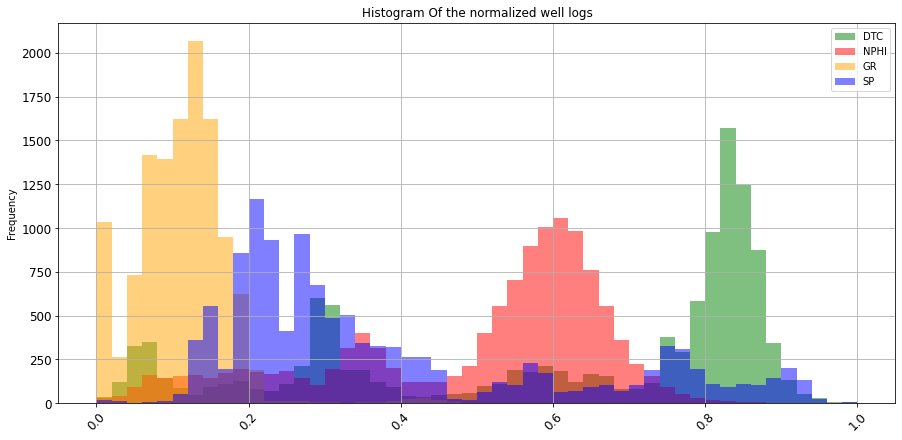

In [10]:
#5. Plot histogram of the normalized and standarized well logs
#histogram of the normalized well logs
df_norm.plot(kind='hist',
        alpha=0.5,
        bins=50,
        title='Histogram Of the normalized well logs',
        rot=45,
        grid=True,
        figsize=(15,7),
        fontsize=12, 
        color=['g', 'r', 'orange', 'b']);

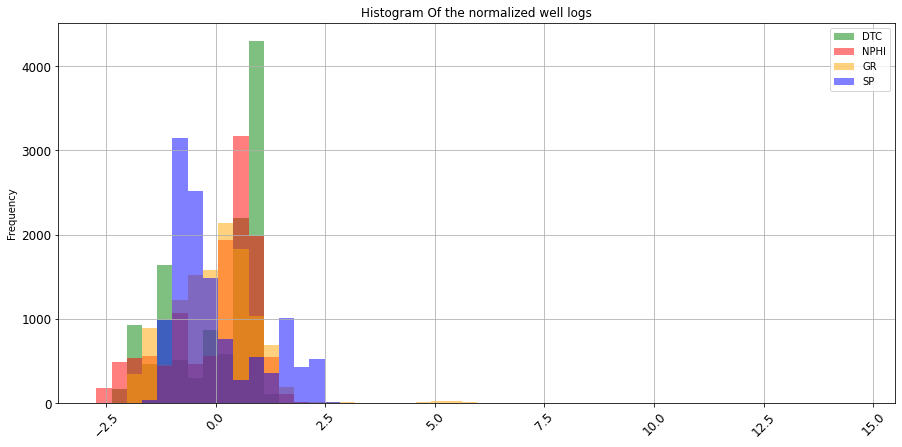

In [11]:
#5. Plot histogram of the normalized and standarized well logs
#histogram of the stardarized well logs
df_stan.plot(kind='hist',
        alpha=0.5,
        bins=50,
        title='Histogram Of the normalized well logs',
        rot=45,
        grid=True,
        figsize=(15,7),
        fontsize=12, 
        color=['g', 'r', 'orange', 'b']);